## Data Loading

### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import spearmanr
from sklearn.decomposition import PCA
from scipy.stats import mannwhitneyu
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

### Data Loading

In [5]:
data = pd.read_csv ('C:/Users/tjjaf/Desktop/Operation CPECTRUM\BRCA Data Biostats - UWCN.csv')

## Data Cleaning

In [6]:
data.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [7]:
data.shape

(569, 32)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           569 non-null    int64  
 1   x.radius_mean        569 non-null    float64
 2   x.texture_mean       569 non-null    float64
 3   x.perimeter_mean     569 non-null    float64
 4   x.area_mean          569 non-null    float64
 5   x.smoothness_mean    569 non-null    float64
 6   x.compactness_mean   569 non-null    float64
 7   x.concavity_mean     569 non-null    float64
 8   x.concave_pts_mean   569 non-null    float64
 9   x.symmetry_mean      569 non-null    float64
 10  x.fractal_dim_mean   569 non-null    float64
 11  x.radius_se          569 non-null    float64
 12  x.texture_se         569 non-null    float64
 13  x.perimeter_se       569 non-null    float64
 14  x.area_se            569 non-null    float64
 15  x.smoothness_se      569 non-null    flo

In [9]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
data['y'].value_counts()

y
B    357
M    212
Name: count, dtype: int64

### One-Hot Encoding

In [11]:
data = pd.get_dummies(data, columns=['y'], drop_first=True)
data.rename(columns={'y_M': 'malignant', 'y_B': 'benign'}, inplace=True)
data.head()


,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,malignant
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,False
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,False
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,False
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,False
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,False


In [12]:
data['malignant'].value_counts()

malignant
False    357
True     212
Name: count, dtype: int64

### Dropping Outliers

In [13]:
z_scores = (data - data.mean()) / data.std()
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)
data_no_outliers = data[~outliers.any(axis=1)]
rows_removed = len(data) - len(data_no_outliers)
print(f"Number of rows removed due to outliers: {rows_removed}")
data_no_outliers.reset_index(drop=True, inplace=True)

Number of rows removed due to outliers: 74


In [14]:
data_no_outliers.shape

(495, 31)

In [15]:
data_no_outliers.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,malignant
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,False
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,False
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,False
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,False
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,False


## Exploratory Data Analysis

In [16]:
data_no_outliers.describe()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,...,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,13.868883,18.889778,89.931939,622.613333,0.095075,0.094741,0.074145,0.043306,0.177602,0.061779,...,15.846776,25.152343,103.961111,820.704848,0.130829,0.231213,0.240894,0.106625,0.283788,0.081467
std,3.042868,3.966250,20.795084,286.903247,0.012822,0.041071,0.061694,0.032550,0.023258,0.005546,...,4.130793,5.666008,28.312550,452.870860,0.021069,0.125632,0.171007,0.058203,0.049675,0.014411
min,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
25%,11.745000,16.000000,75.475000,424.800000,0.085345,0.062310,0.027420,0.019485,0.160800,0.057490,...,13.055000,20.845000,84.440000,517.150000,0.115950,0.140000,0.106450,0.063060,0.248750,0.070830
50%,13.210000,18.580000,85.630000,538.900000,0.094620,0.085490,0.053080,0.030700,0.177100,0.061150,...,14.800000,25.110000,96.530000,670.000000,0.130100,0.203100,0.195600,0.092220,0.278500,0.078750
75%,15.290000,21.460000,100.250000,718.050000,0.103700,0.120150,0.107250,0.062770,0.193000,0.065105,...,17.730000,28.900000,117.700000,970.050000,0.143600,0.305050,0.349200,0.148950,0.311300,0.089850
max,23.270000,30.720000,152.100000,1686.000000,0.137100,0.228400,0.317400,0.156200,0.254000,0.079760,...,28.190000,41.610000,195.900000,2403.000000,0.190900,0.664300,0.848900,0.270100,0.475300,0.134100


### Data Visualization

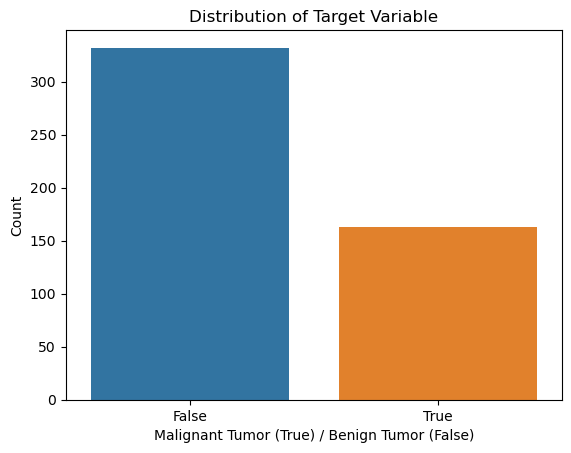

In [17]:
sns.countplot(x=data_no_outliers['malignant'].astype(str))
plt.title('Distribution of Target Variable')
plt.xlabel('Malignant Tumor (True) / Benign Tumor (False)')
plt.ylabel('Count')
plt.show()

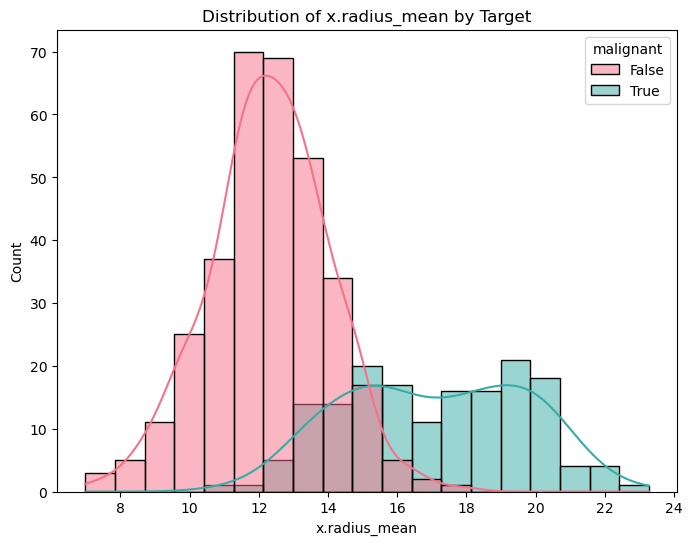

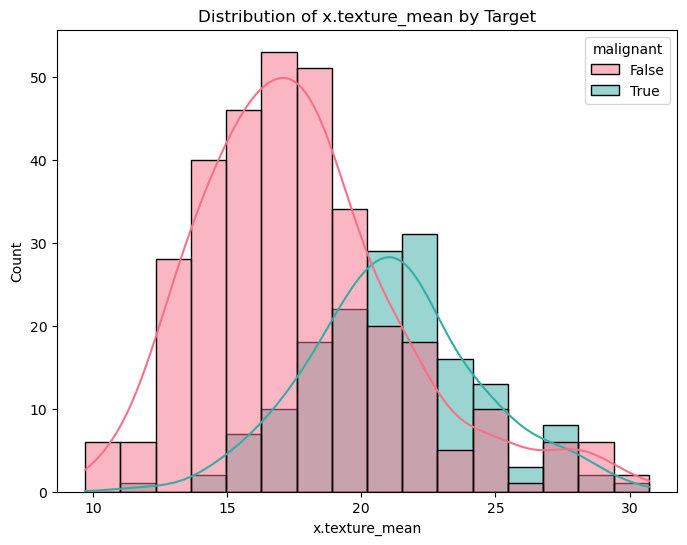

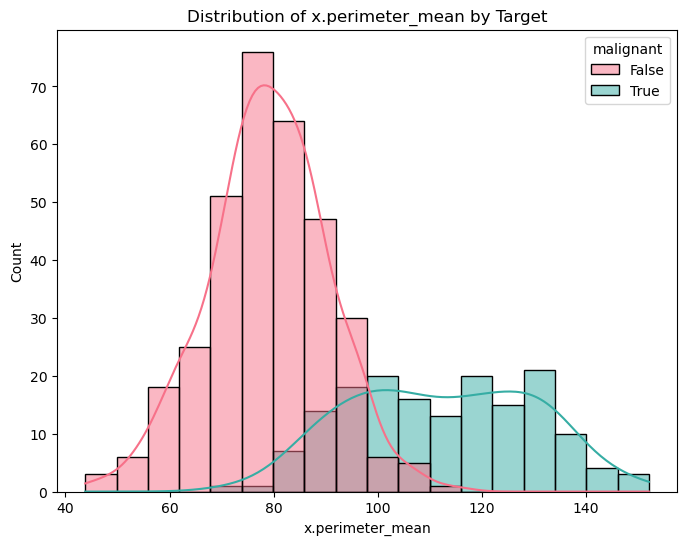

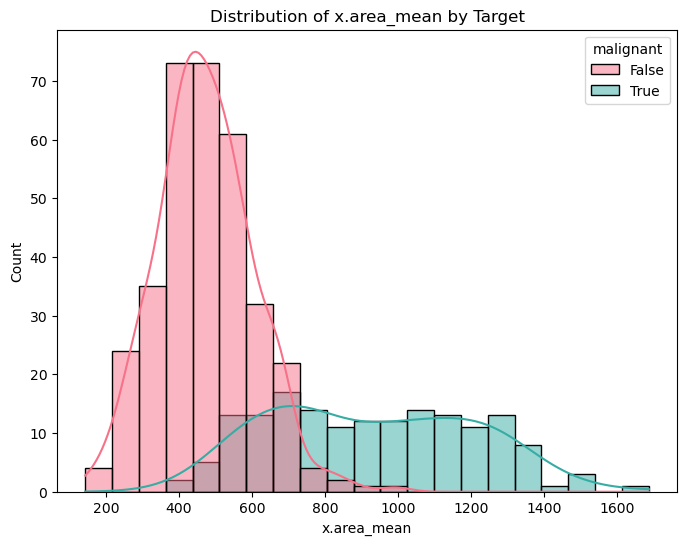

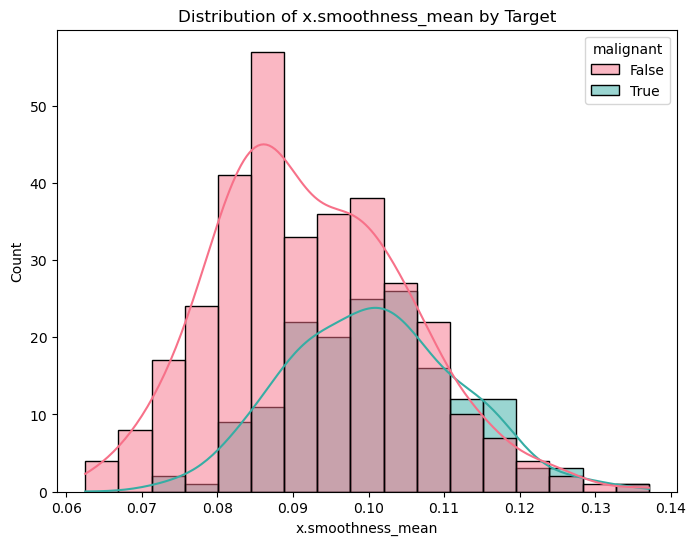

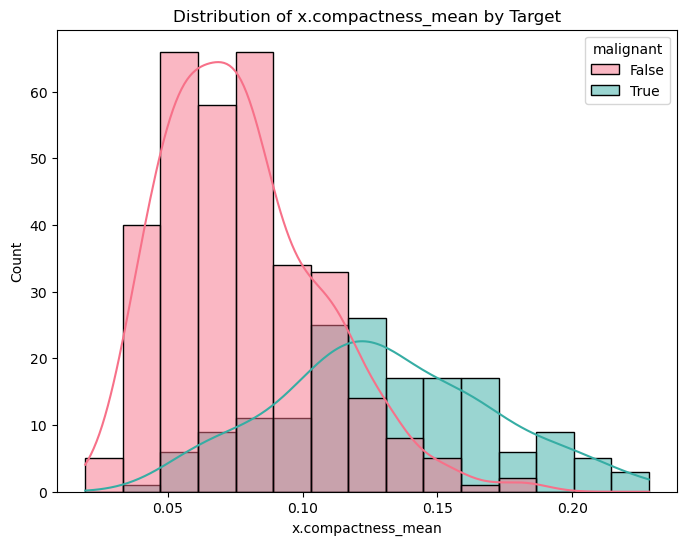

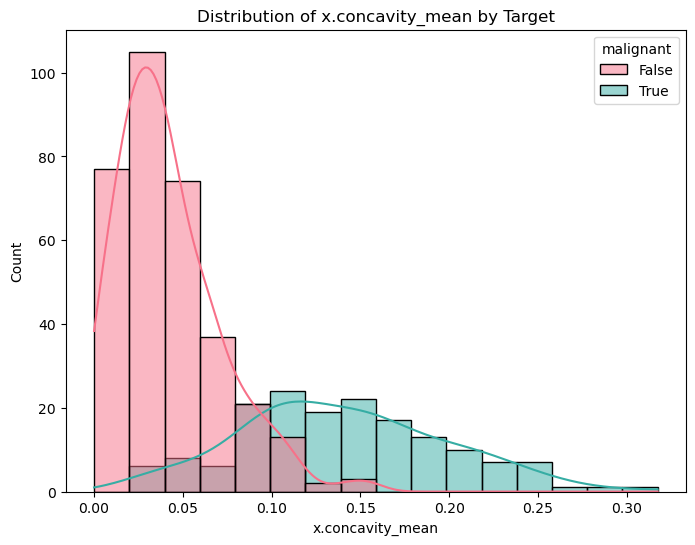

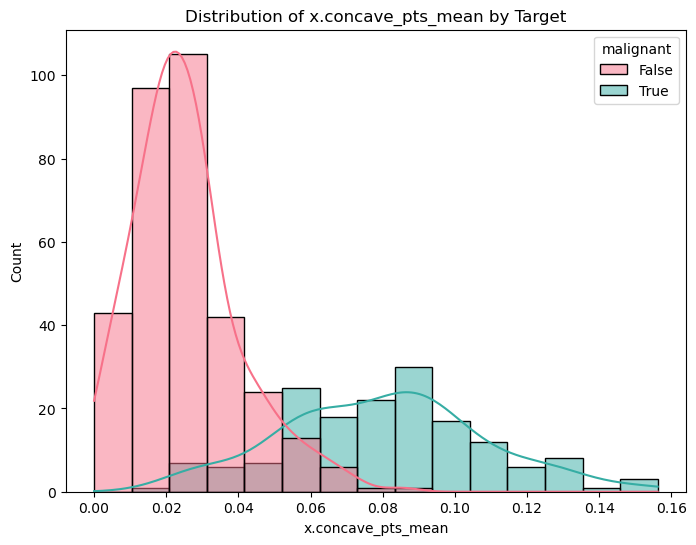

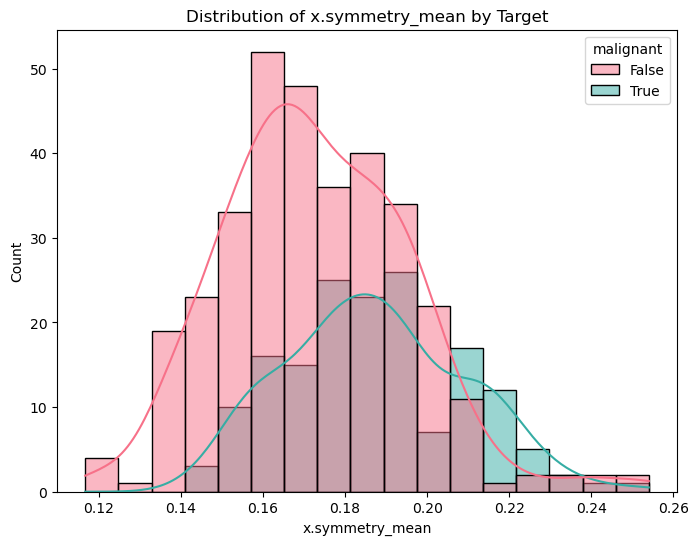

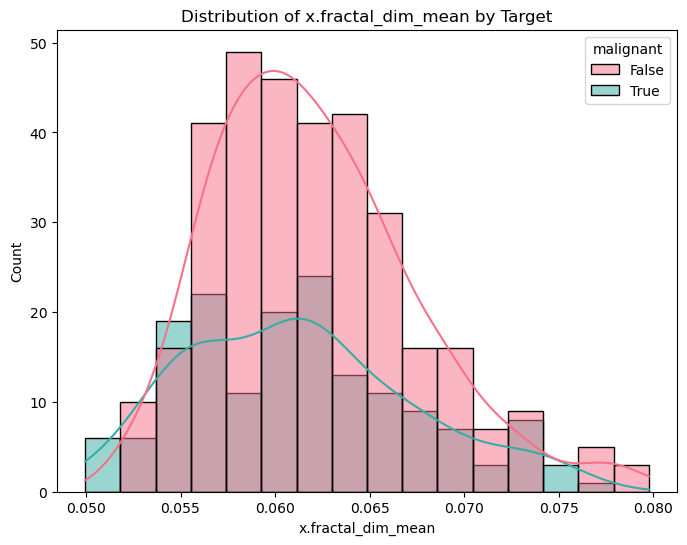

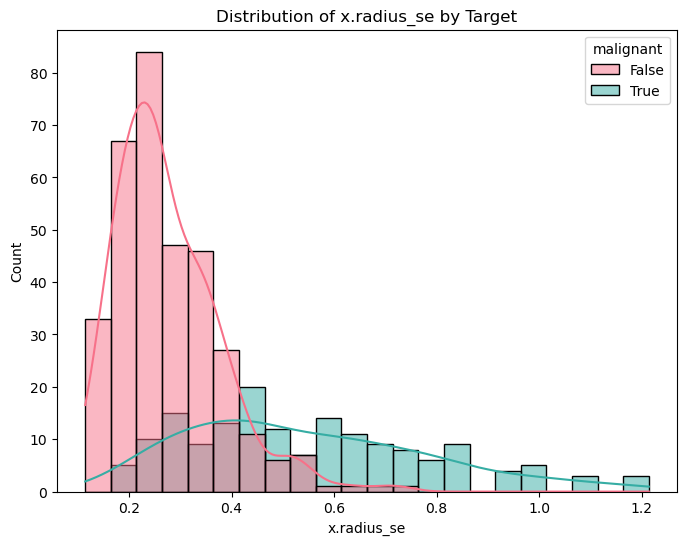

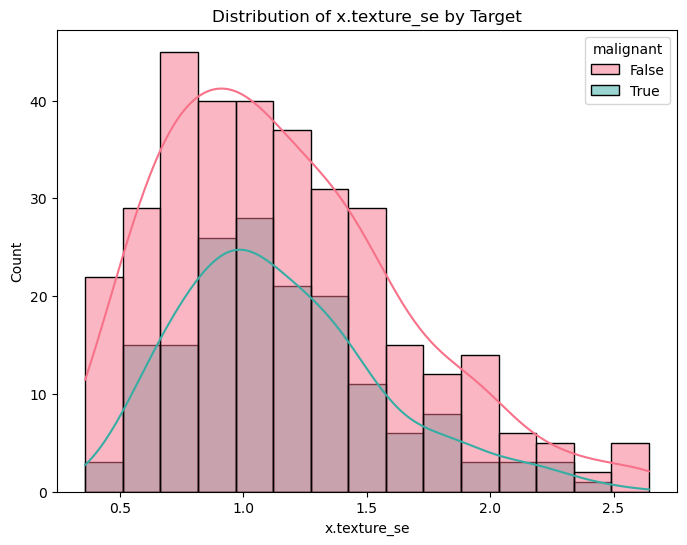

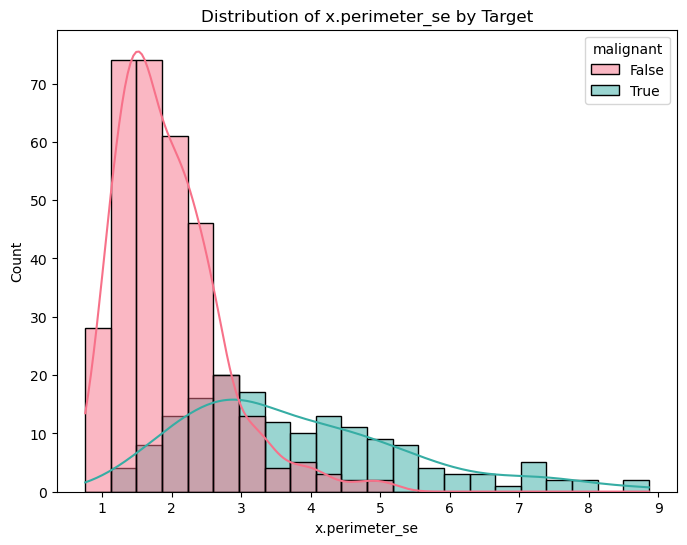

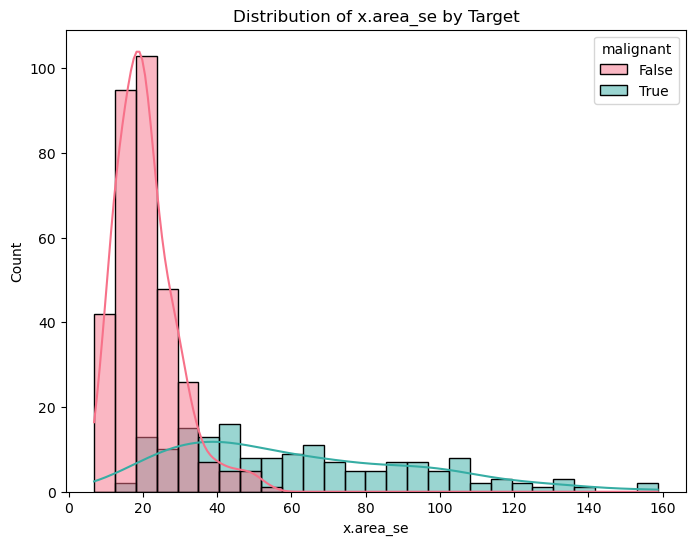

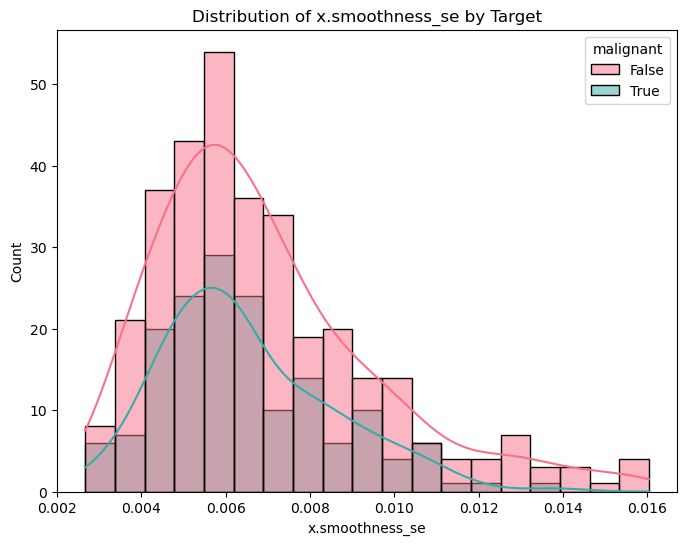

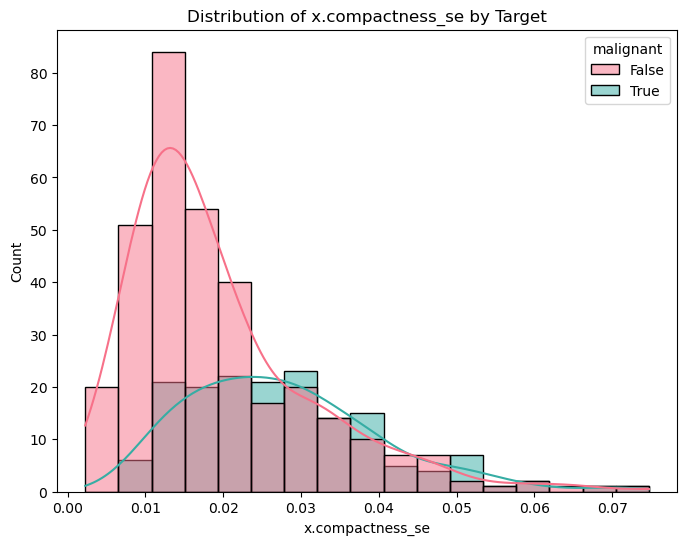

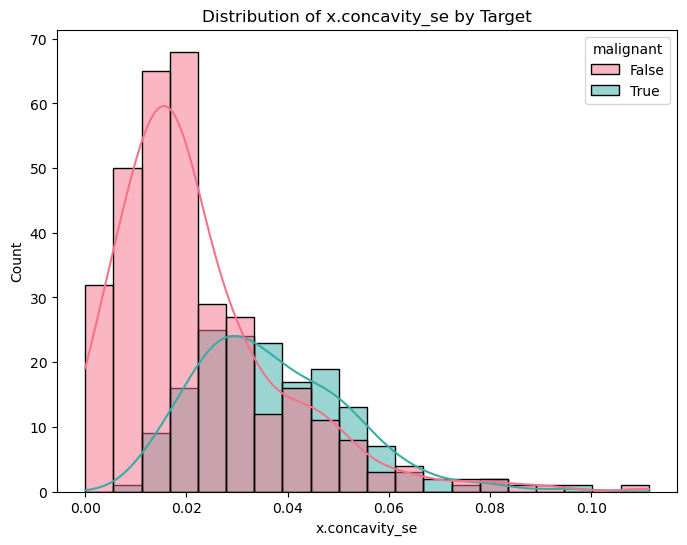

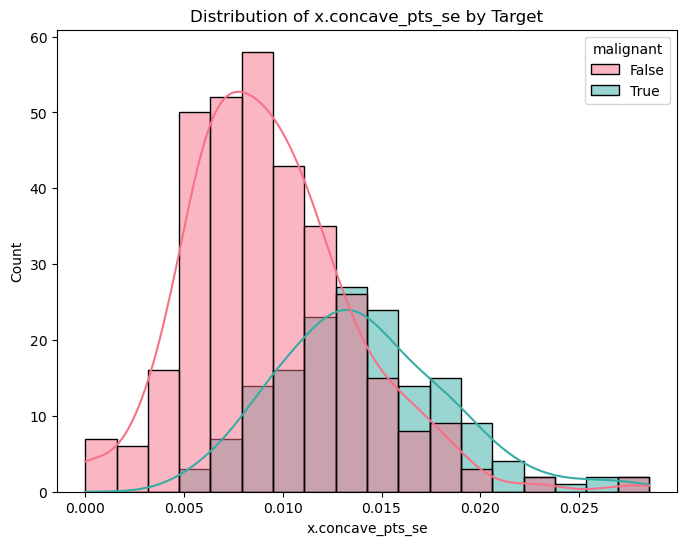

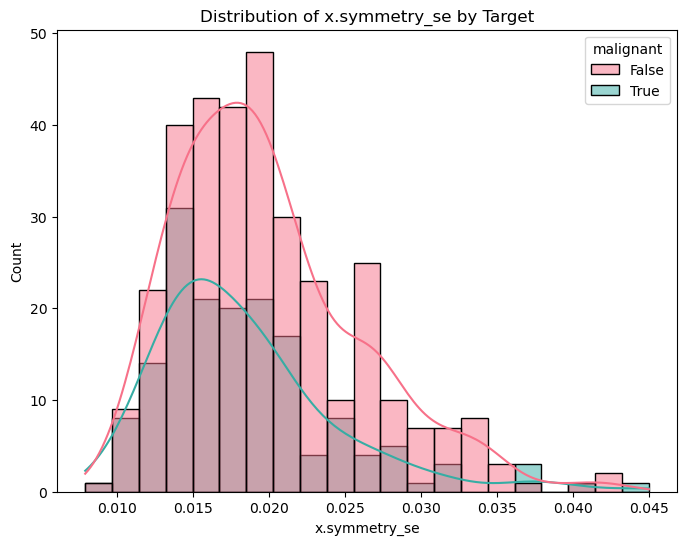

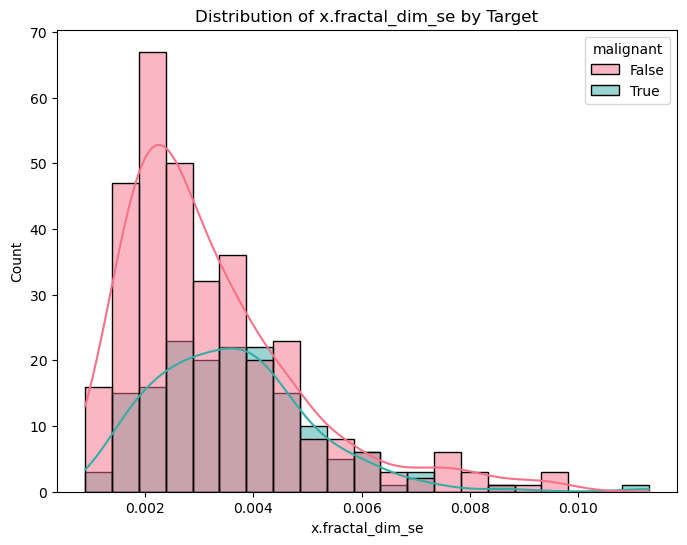

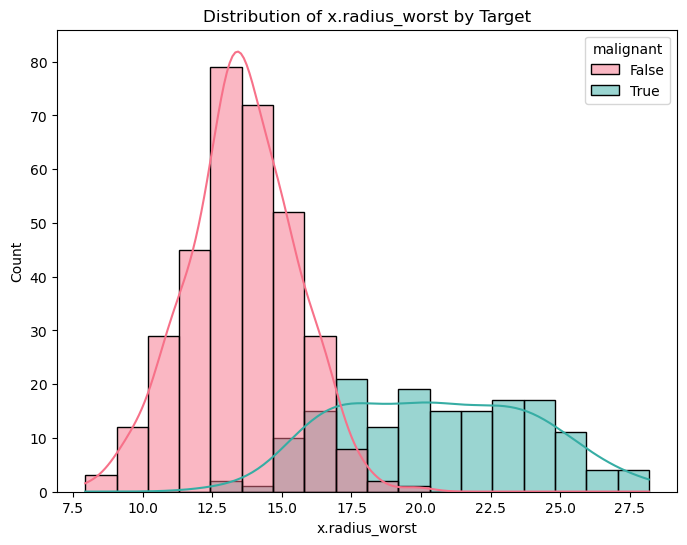

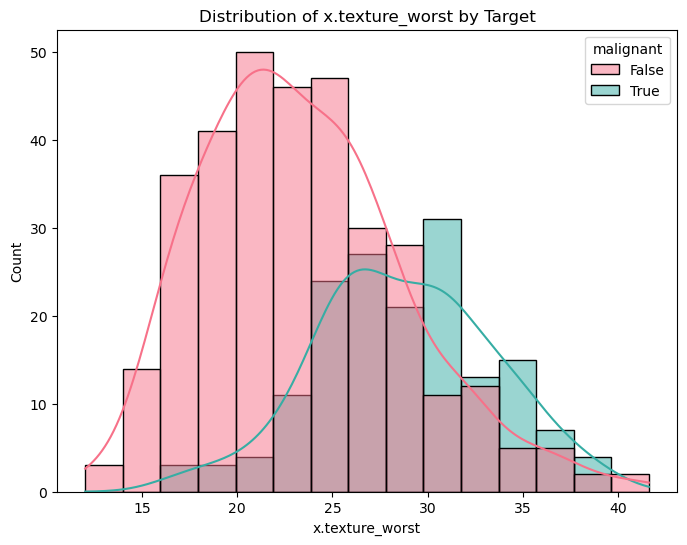

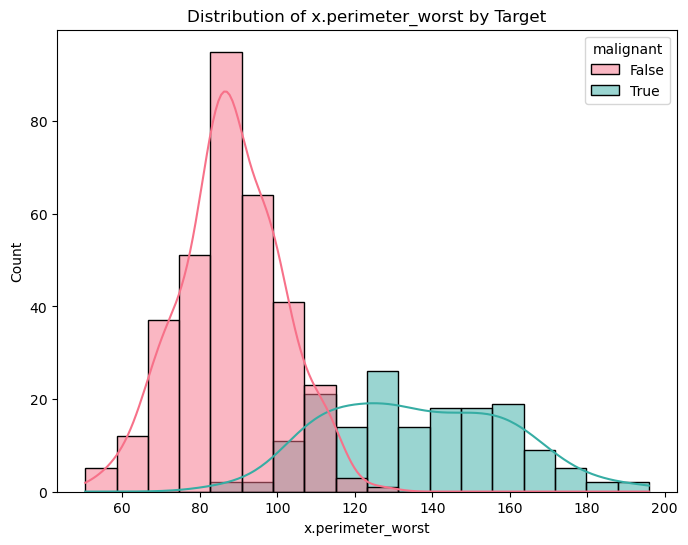

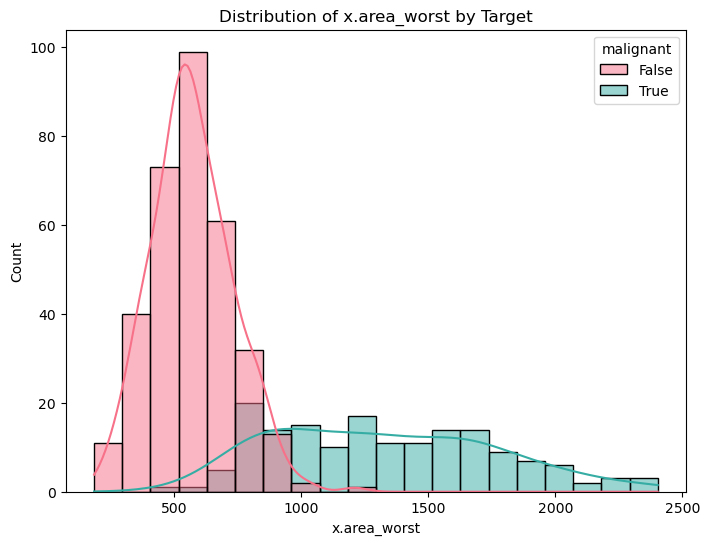

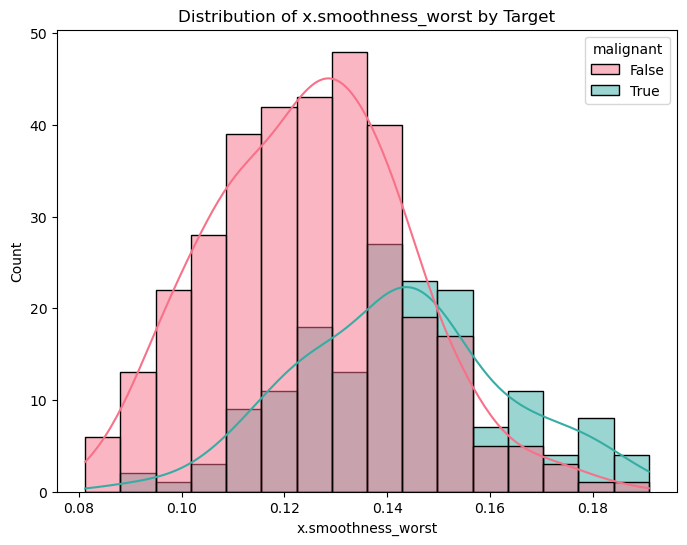

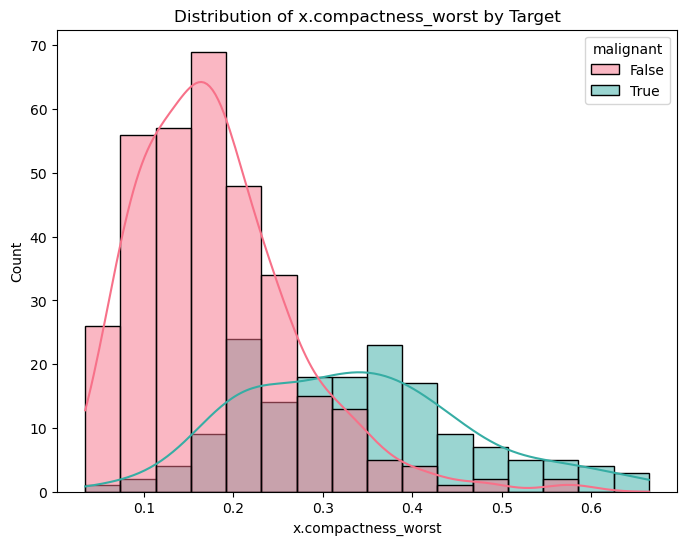

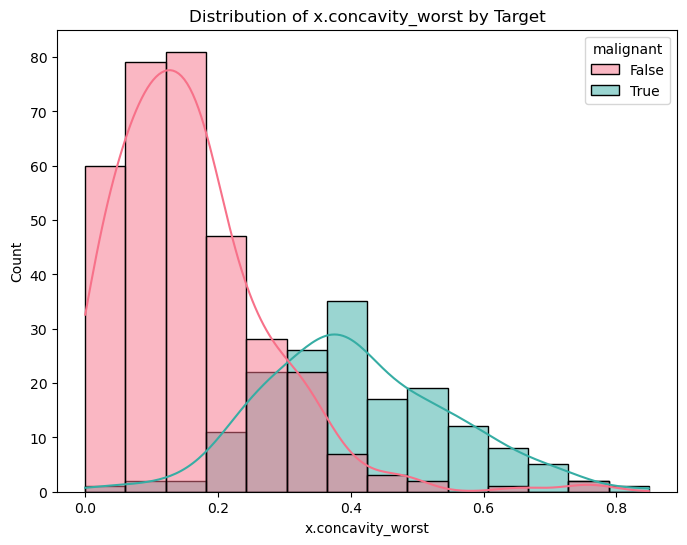

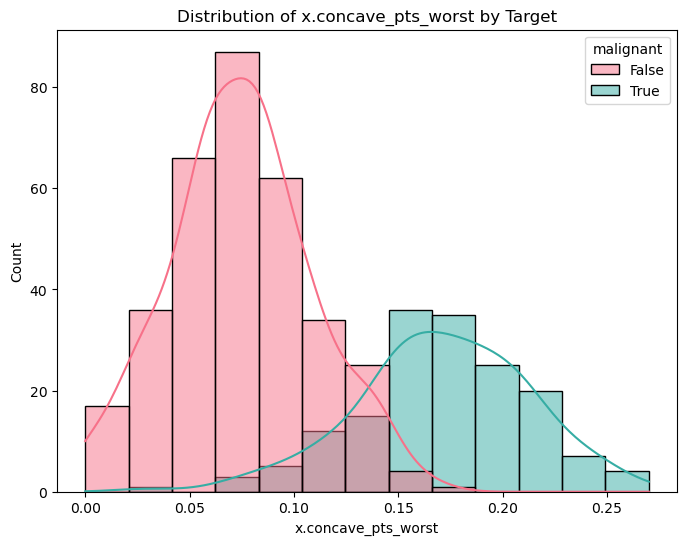

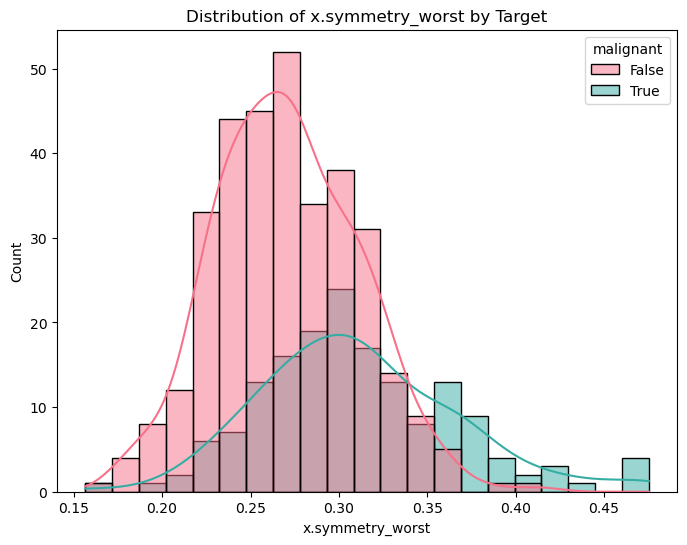

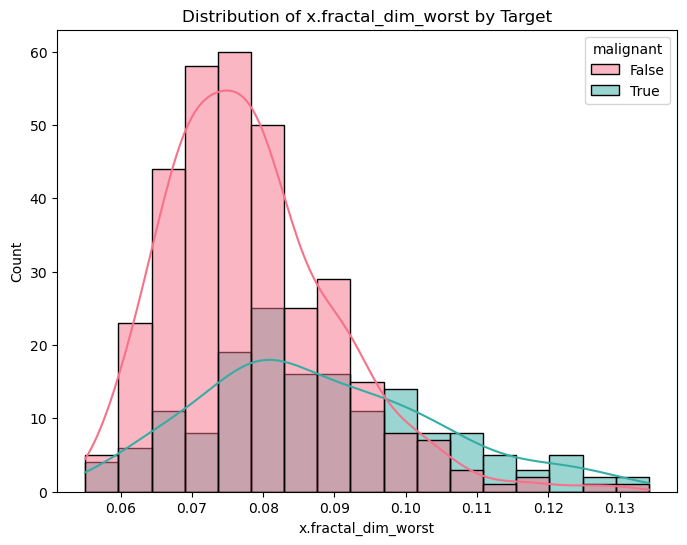

In [18]:
features = data_no_outliers.columns[:-1]
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data_no_outliers, x=feature, hue='malignant', kde=True, palette='husl')
    plt.title(f'Distribution of {feature} by Target')
    plt.show()

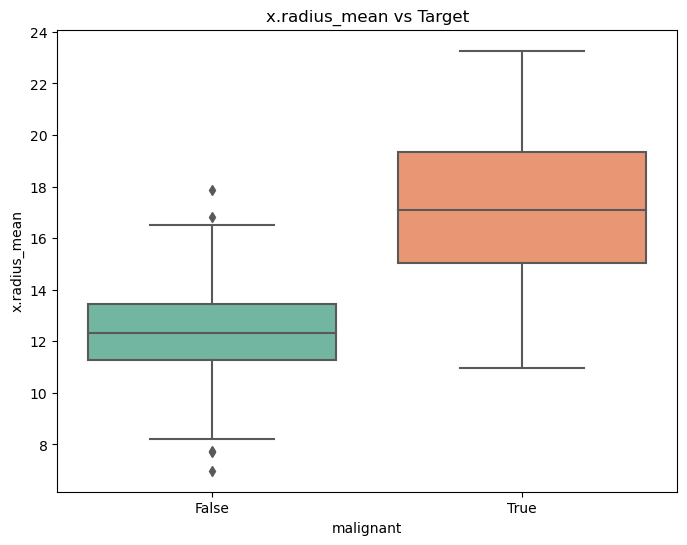

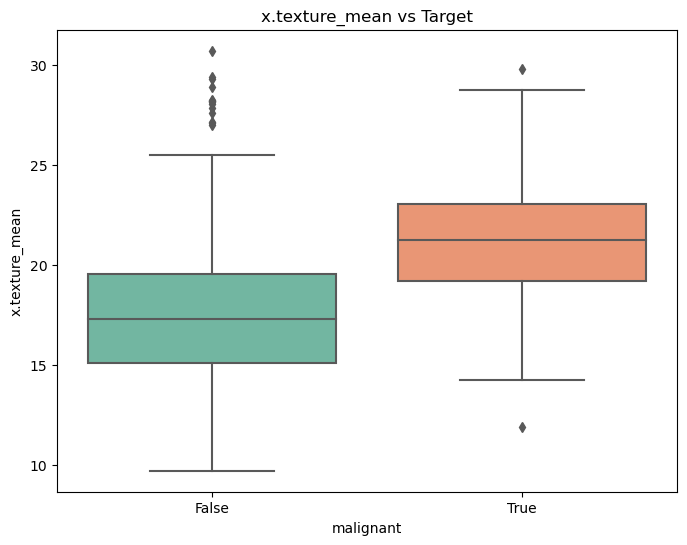

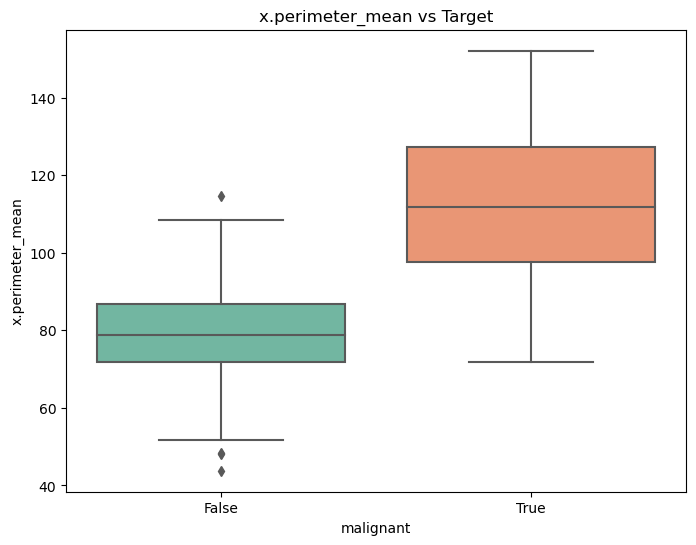

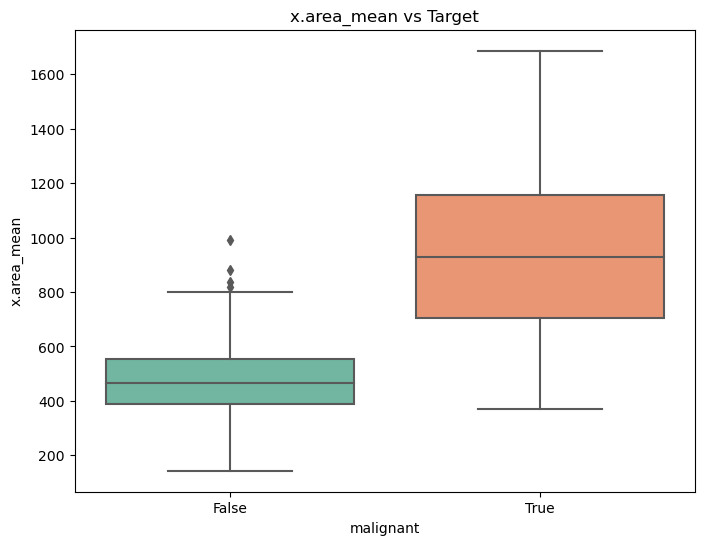

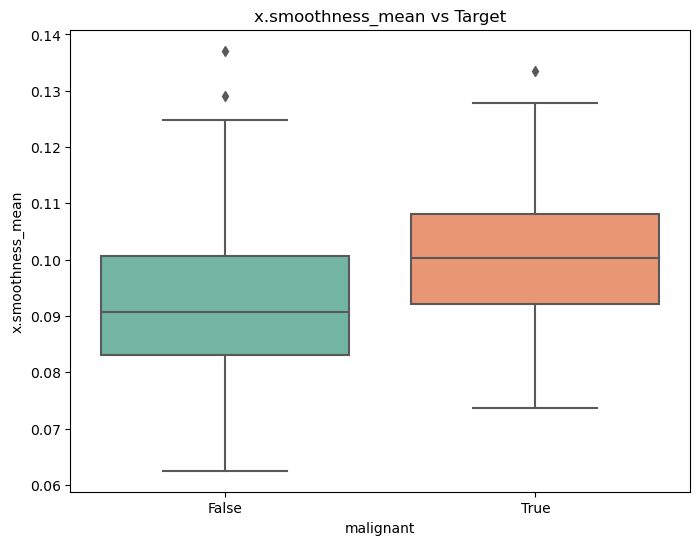

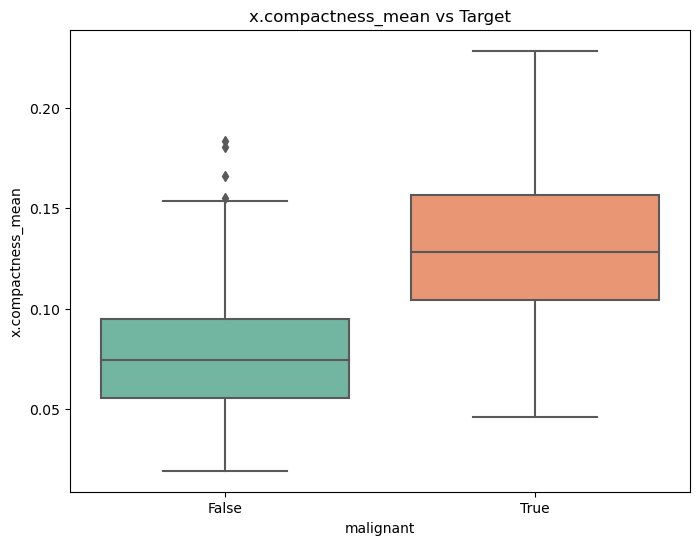

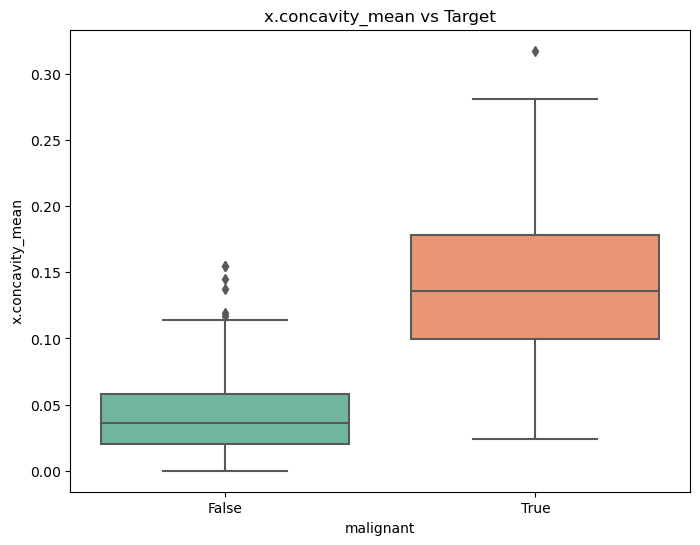

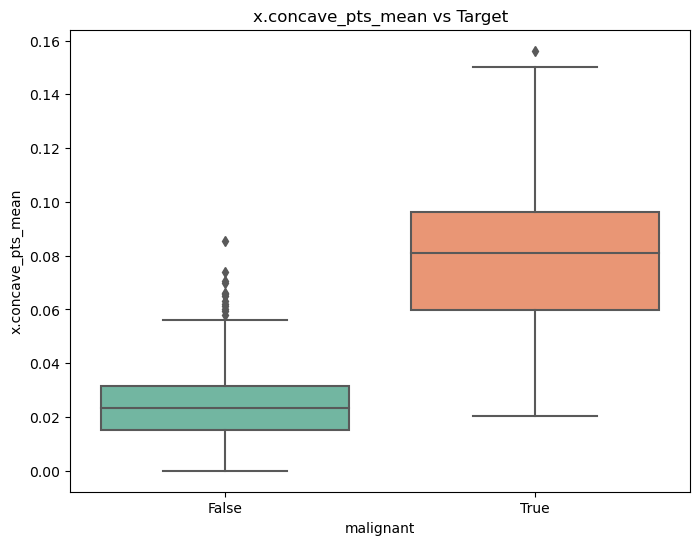

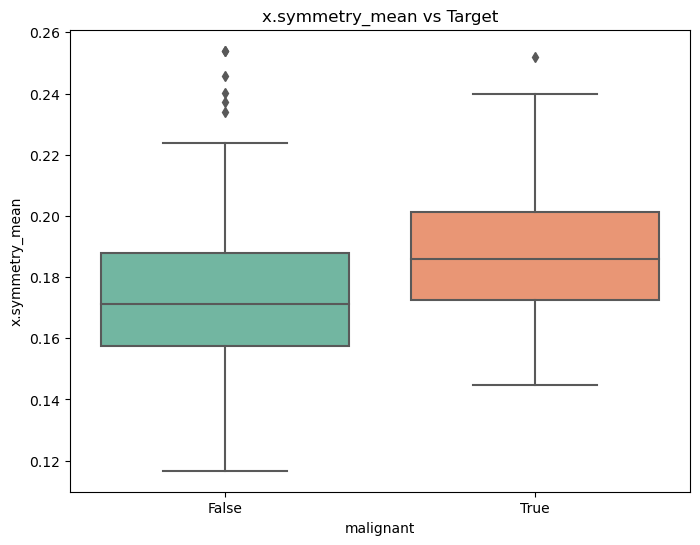

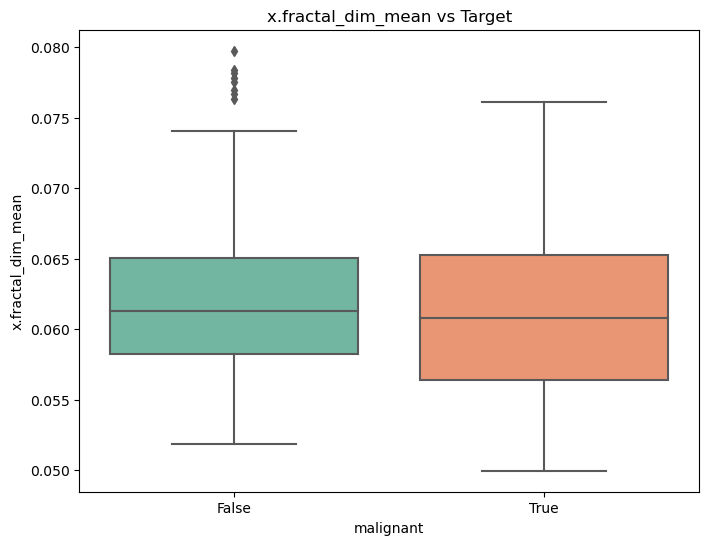

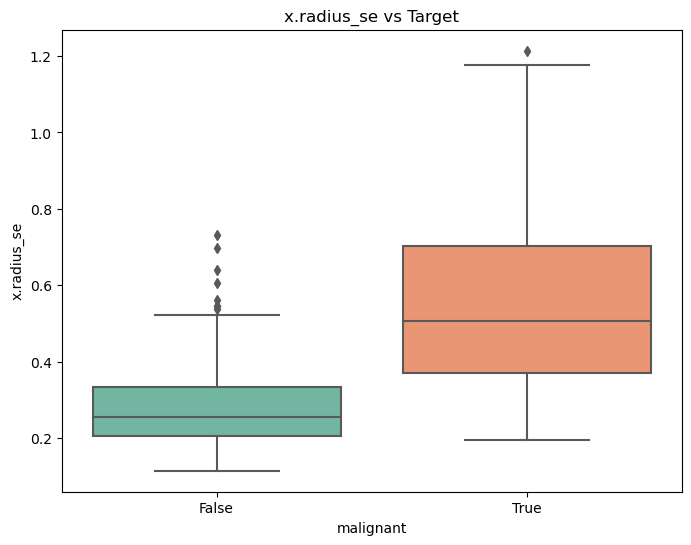

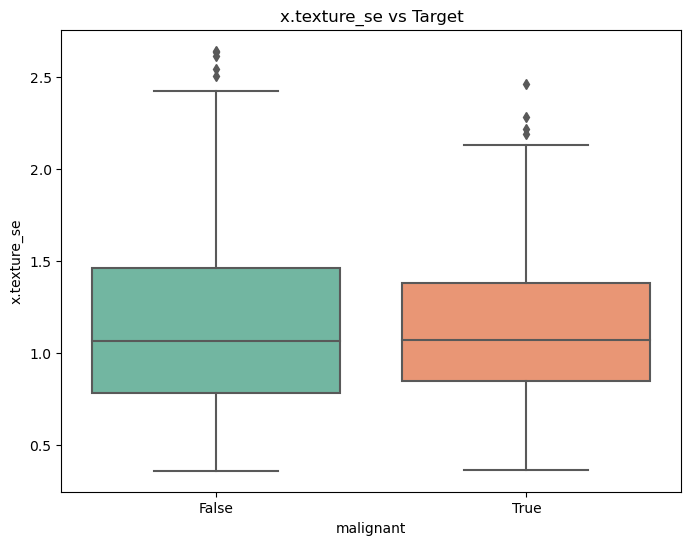

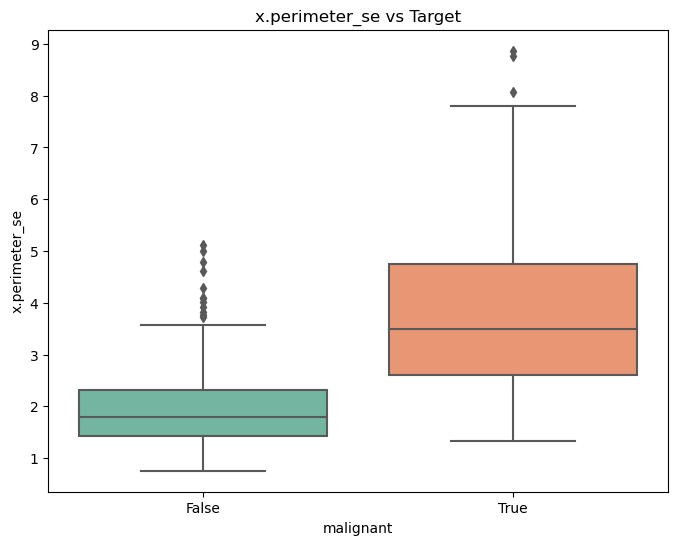

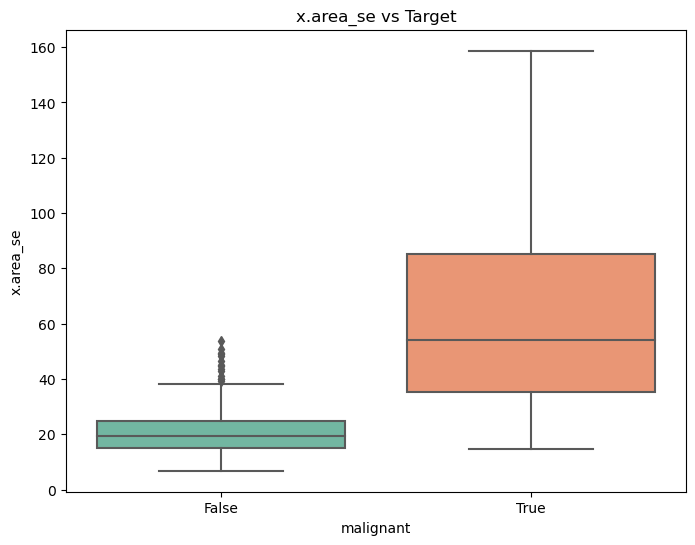

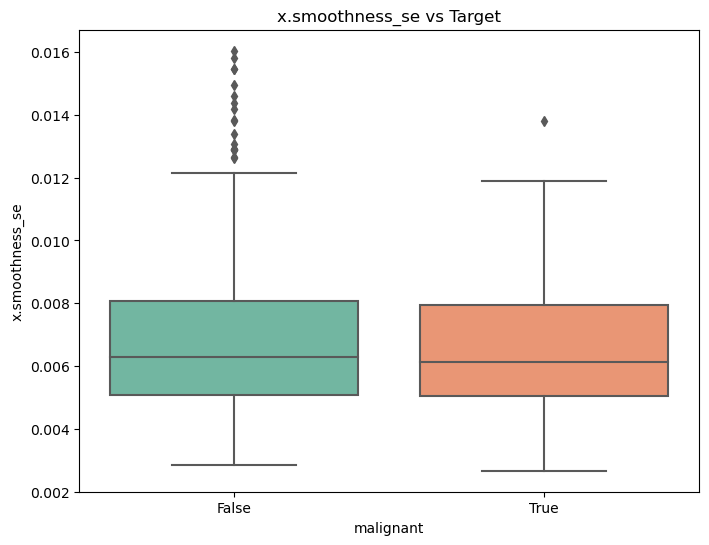

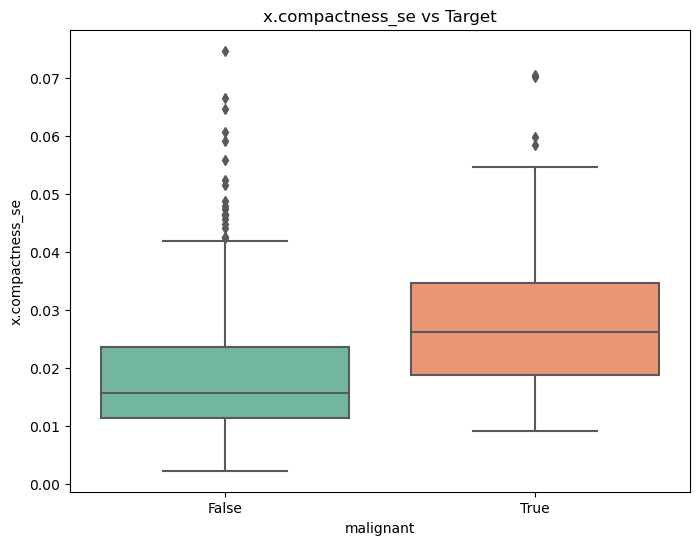

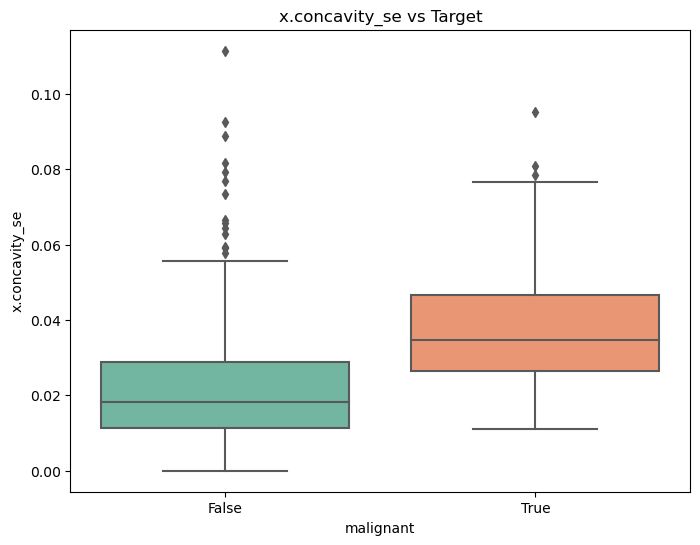

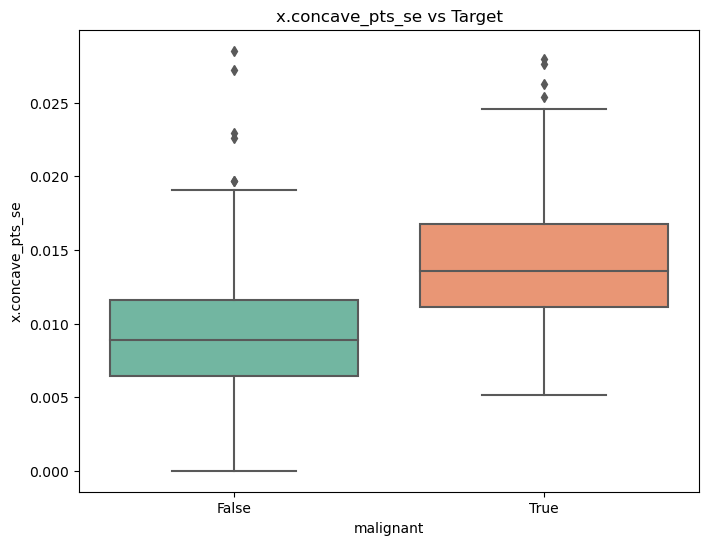

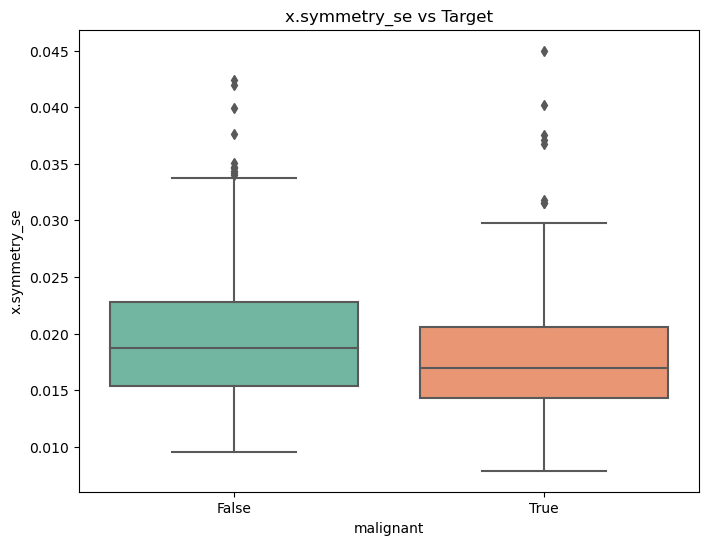

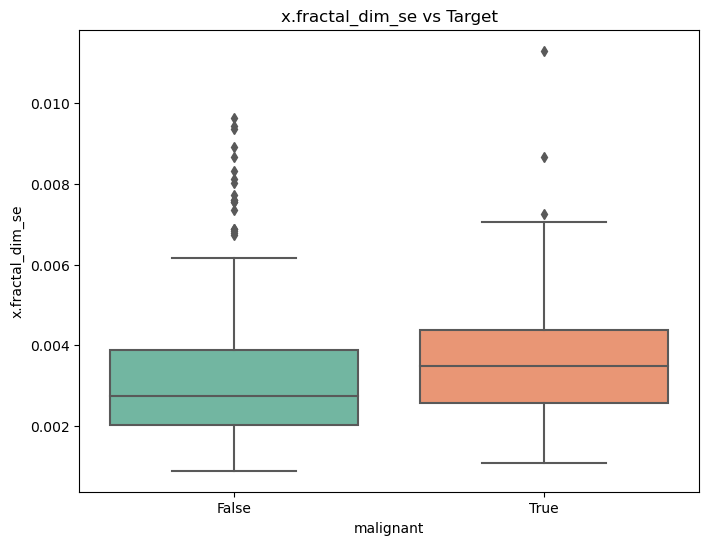

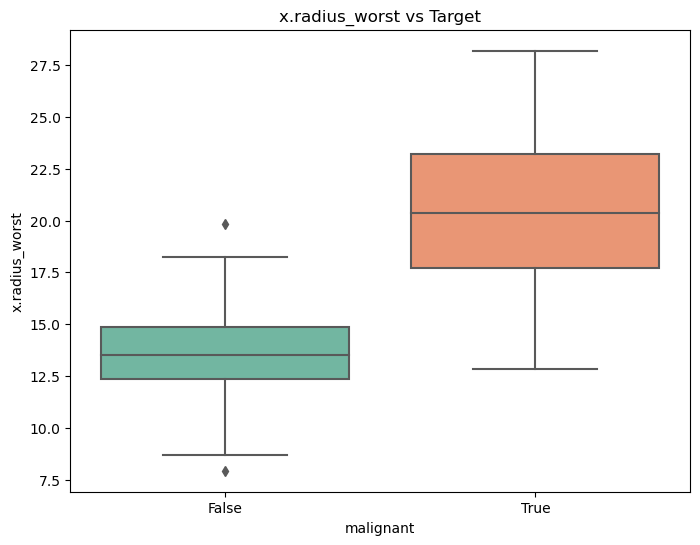

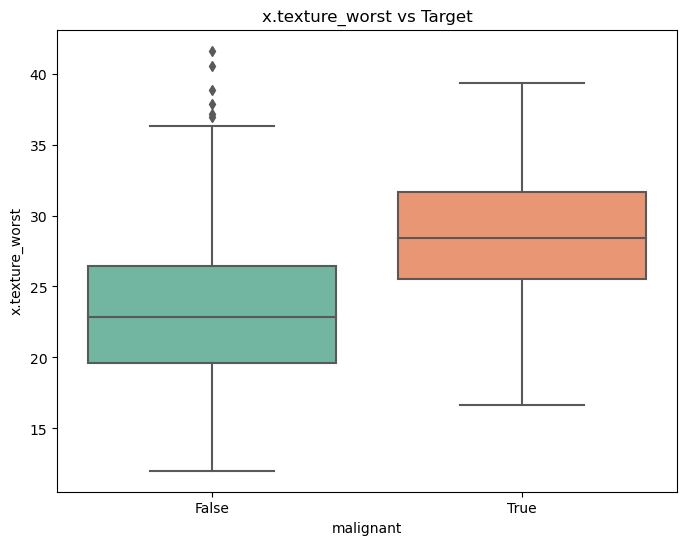

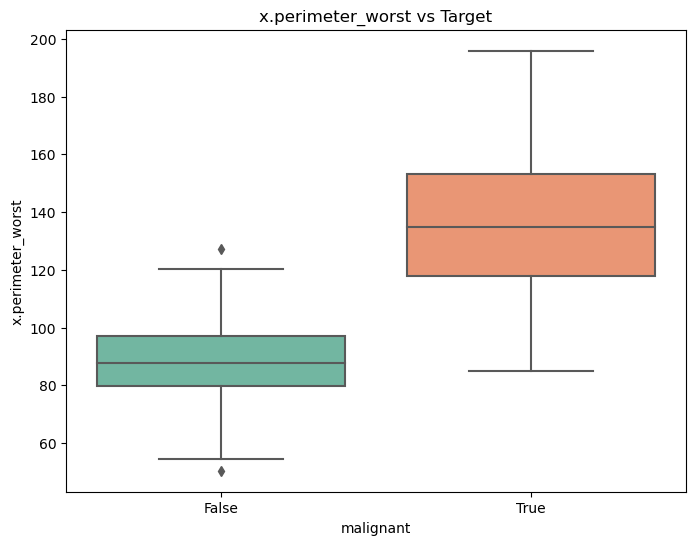

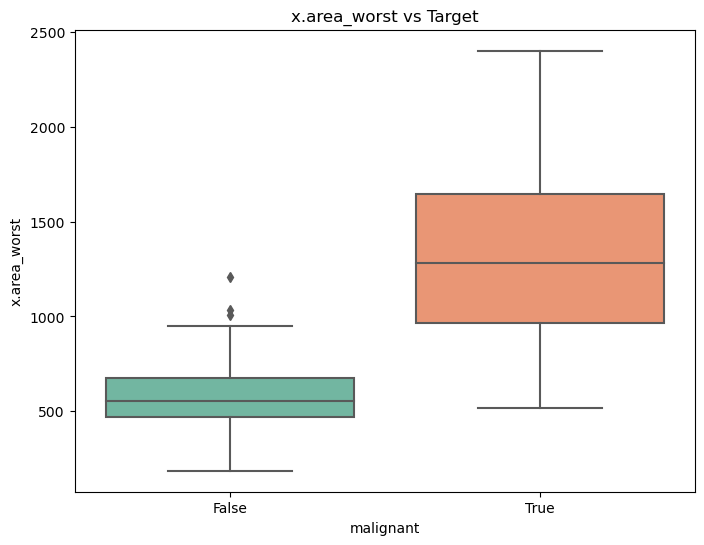

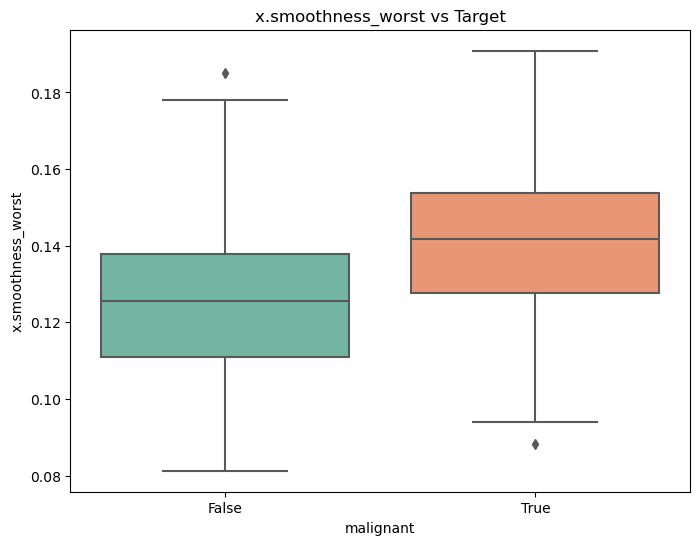

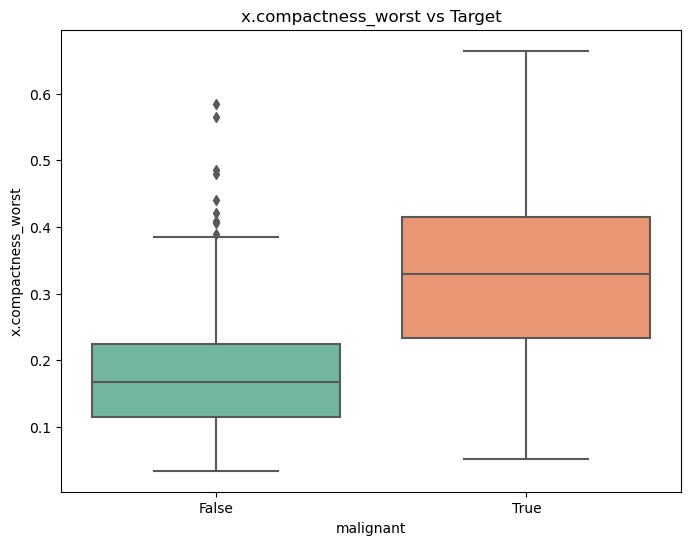

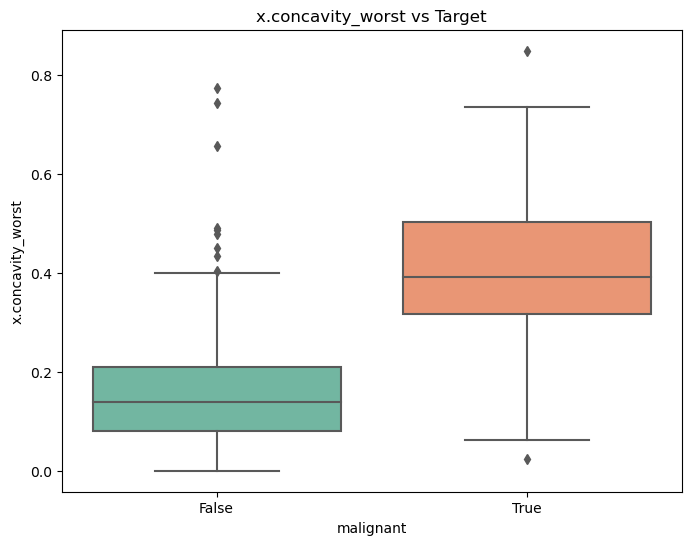

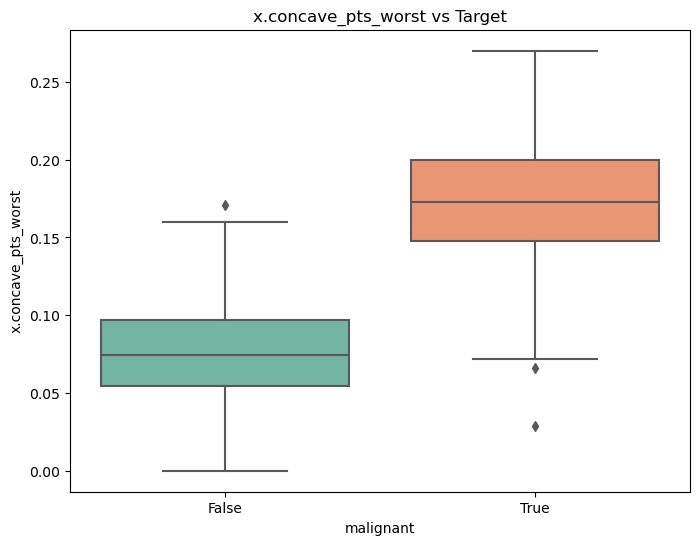

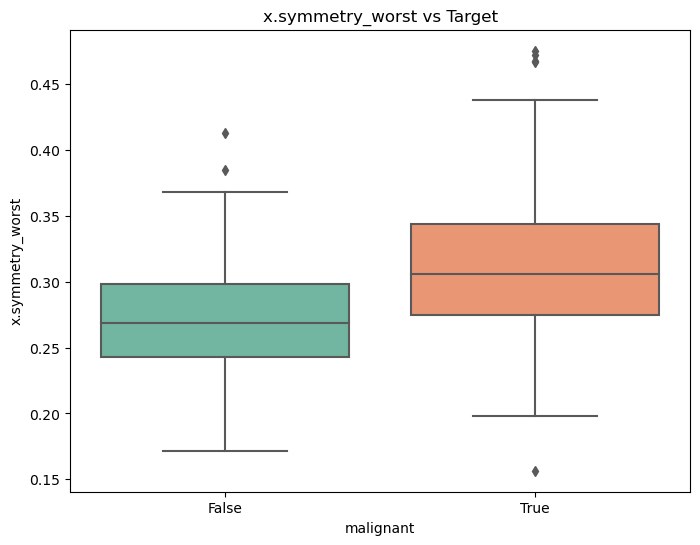

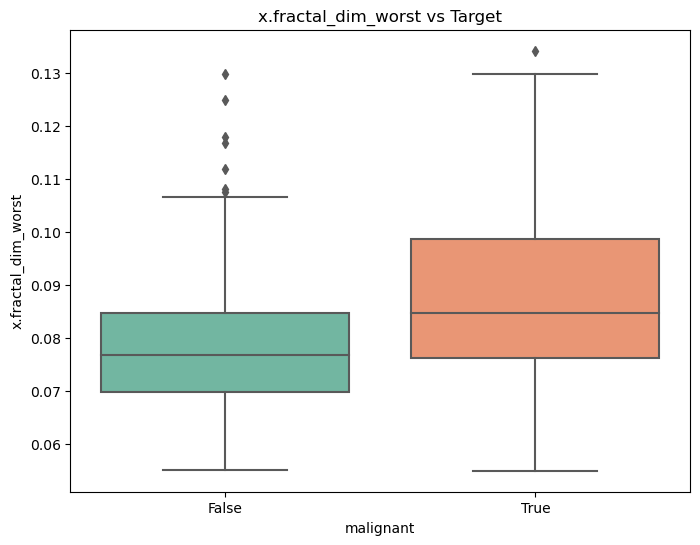

In [19]:
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='malignant', y=feature, data=data_no_outliers, palette='Set2')
    plt.title(f'{feature} vs Target')
    plt.show()

### Examining Normality of Data

In [20]:
for feature in features:
    stat, p = shapiro(data[feature])
    print(f'Shapiro-Wilk test for {feature}: Statistics={stat}, p-value={p}')
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Shapiro-Wilk test for x.radius_mean: Statistics=0.9410693645477295, p-value=3.105940390947179e-14
Sample does not look Gaussian (reject H0)
Shapiro-Wilk test for x.texture_mean: Statistics=0.9767202734947205, p-value=7.282039860001532e-08
Sample does not look Gaussian (reject H0)
Shapiro-Wilk test for x.perimeter_mean: Statistics=0.9361824989318848, p-value=7.011342749468257e-15
Sample does not look Gaussian (reject H0)
Shapiro-Wilk test for x.area_mean: Statistics=0.858401894569397, p-value=3.1965406234734204e-22
Sample does not look Gaussian (reject H0)
Shapiro-Wilk test for x.smoothness_mean: Statistics=0.9874873757362366, p-value=8.600336877861992e-05
Sample does not look Gaussian (reject H0)
Shapiro-Wilk test for x.compactness_mean: Statistics=0.9169781804084778, p-value=3.9676217698195954e-17
Sample does not look Gaussian (reject H0)
Shapiro-Wilk test for x.concavity_mean: Statistics=0.8668311834335327, p-value=1.3386320802392117e-21
Sample does not look Gaussian (reject H0)
Shap

## Principal Component Analysis

### Data Classification

In [21]:
tumor_size_class = data[['x.radius_mean', 'x.perimeter_mean', 'x.area_mean',
                         'x.radius_worst', 'x.perimeter_worst', 'x.area_worst']].values

tumor_irregularity_class = data[['x.texture_mean', 'x.smoothness_mean', 'x.compactness_mean',
                                 'x.concavity_mean', 'x.concave_pts_mean', 'x.symmetry_mean',
                                 'x.fractal_dim_mean', 'x.texture_worst',
                                 'x.smoothness_worst', 'x.compactness_worst', 'x.concavity_worst',
                                 'x.concave_pts_worst', 'x.symmetry_worst',
                                 'x.fractal_dim_worst']].values


### PCA Instantiation

In [22]:
pca_tumor_size = PCA(n_components=3)

tumor_size_pca_result = pca_tumor_size.fit_transform(tumor_size_class)

variance_ratio_tumor_size = pca_tumor_size.explained_variance_ratio_
print("Variance Ratio for Tumor Size PCA:", variance_ratio_tumor_size)

Variance Ratio for Tumor Size PCA: [9.83617466e-01 1.62493139e-02 1.25713448e-04]


In [23]:
pca_tumor_irregularity = PCA(n_components=3)

tumor_irregularity_pca_result = pca_tumor_irregularity.fit_transform(tumor_irregularity_class)

variance_ratio_tumor_irregularity = pca_tumor_irregularity.explained_variance_ratio_
print("Variance Ratio for Tumor Irregularity PCA:", variance_ratio_tumor_irregularity)


Variance Ratio for Tumor Irregularity PCA: [0.96005944 0.03857542 0.00117885]


### Visualization of PCA

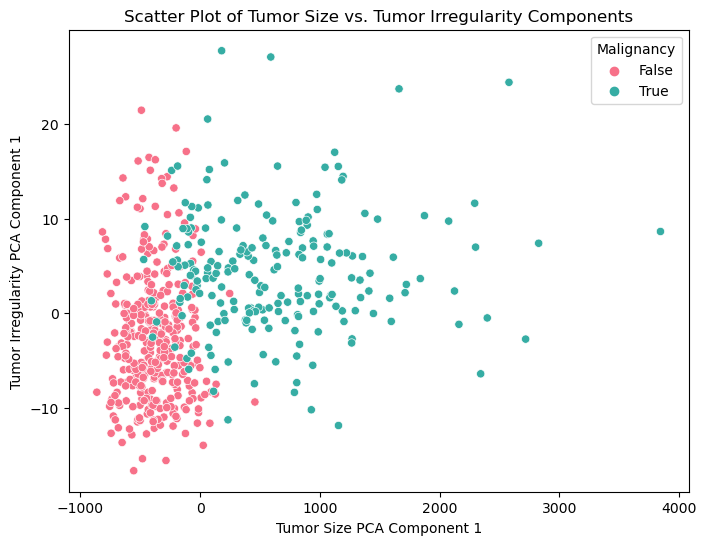

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tumor_size_pca_result[:, 0], y=tumor_irregularity_pca_result[:, 0], hue=data['malignant'], palette='husl')
plt.title('Scatter Plot of Tumor Size vs. Tumor Irregularity Components')
plt.xlabel('Tumor Size PCA Component 1')
plt.ylabel('Tumor Irregularity PCA Component 1')
plt.legend(title='Malignancy')
plt.show()


## Mann Whitney U Test

In [25]:
u_statistic, p_value = mannwhitneyu(tumor_size_pca_result[data['malignant'] == 1], tumor_size_pca_result[data['malignant'] == 0])

print("Tumor Size PCA Component:")
print("  Malignant Median:", np.median(tumor_size_pca_result[data['malignant'] == 1]))
print("  Benign Median:", np.median(tumor_size_pca_result[data['malignant'] == 0]))
print("  U-statistic:", u_statistic)
print("  p-value:", p_value)

u_statistic, p_value = mannwhitneyu(tumor_irregularity_pca_result[data['malignant'] == 1], tumor_irregularity_pca_result[data['malignant'] == 0])

print("\nTumor Irregularity PCA Component:")
print("  Malignant Median:", np.median(tumor_irregularity_pca_result[data['malignant'] == 1]))
print("  Benign Median:", np.median(tumor_irregularity_pca_result[data['malignant'] == 0]))
print("  U-statistic:", u_statistic)
print("  p-value:", p_value)

Tumor Size PCA Component:
  Malignant Median: 1.4834728270194273
  Benign Median: -3.578769324977228
  U-statistic: [72881. 36838. 18784.]
  p-value: [3.00435508e-76 5.96625555e-01 9.07731431e-24]

Tumor Irregularity PCA Component:
  Malignant Median: 0.2509182266248908
  Benign Median: -0.19165756049270452
  U-statistic: [59697. 40791. 63435.]
  p-value: [9.71700956e-31 1.19927399e-01 1.61055982e-41]


## Correlation Analysis

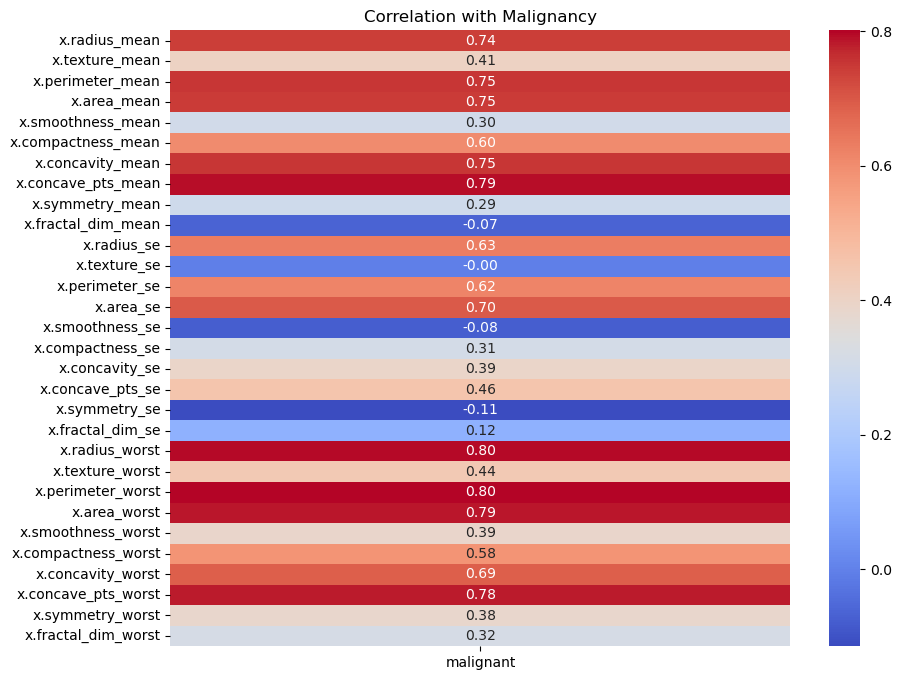

In [33]:
target_correlation = data_no_outliers.corr()['malignant'].drop('malignant')
plt.figure(figsize=(10, 8))
sns.heatmap(target_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Malignancy')
plt.show()


## Feature Importance using Random Forests

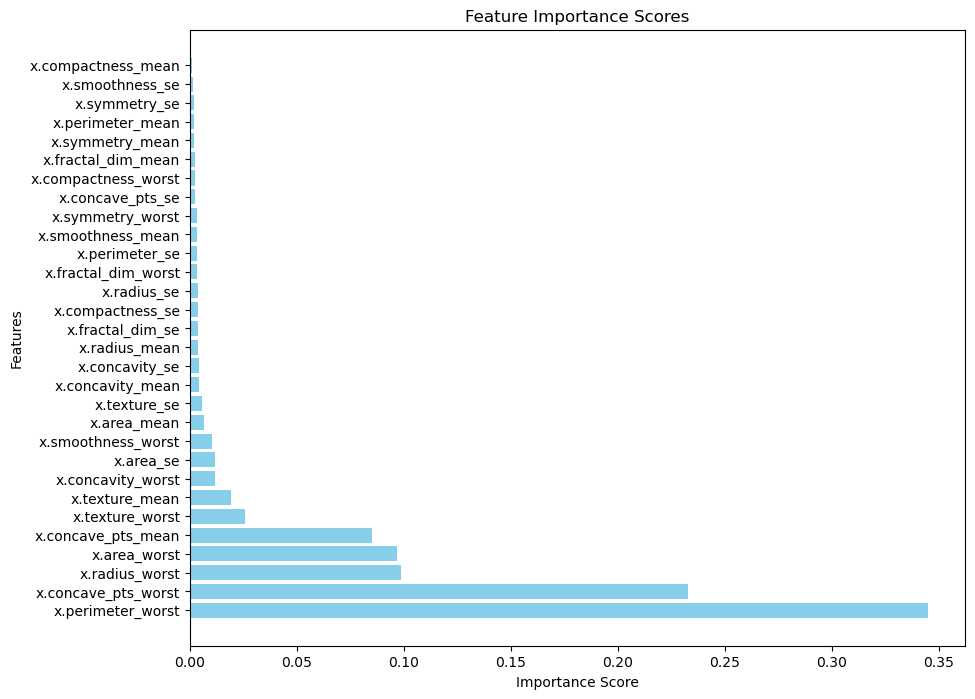

In [27]:
X = data.drop(columns=['malignant'])
y = data['malignant']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importance_scores = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()

## Machine Learning Model - Logistic Regression

### Data Preparation

In [28]:
X = data_no_outliers.drop(columns=['malignant'])
y = data_no_outliers['malignant']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training

In [30]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

### Model Evaluation

In [31]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9595959595959596
Precision: 0.967741935483871
Recall: 0.9090909090909091
F1 Score: 0.9374999999999999
Confusion Matrix:
 [[65  1]
 [ 3 30]]


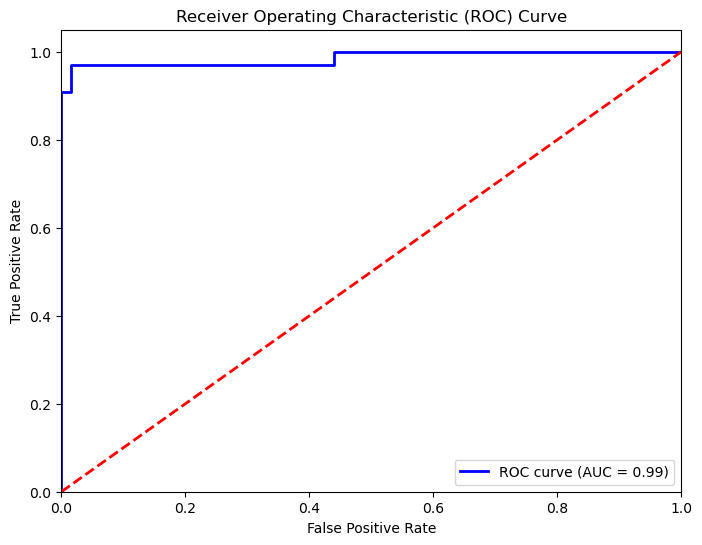

In [32]:
y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()